# Project: (WeRateDogs)

In [313]:
#import libraries
import os
import requests
import tweepy
import pandas as pd
import json
import numpy as np 
import re
import time
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important;}</style>"))


<a href="#Gathering">Gathering Data</a>

<li><a href="#image">image prediction</a></li>

<li><a href="#Archive">Archive </a></li>

<li><a href="#api">Tweet_json </a></li>

<a href="#Assess">Assess </a>

<li><a href="#image asess ">image prediction </a></li>

<li><a href="#Archive assess">Archive  </a></li>

<li><a href="#api assess">Tweet_json </a></li>

<a href="#Clean">Clean<a/>


<a href="#Store Data">Store Data<a/>
    
<a href="#Analyse data">Analyse Data<a/>

<a href="#Visualizing">Visualizing Data</a>


# Gathering 
<a id ="Gathering"></a>

##### image prediction
<a id = "image"></a>

In [315]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Get the response object of the requests library 
response = requests.get(url)
# response=requesrs.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# GET the file name programmatically
file_name = url.split('/')[-1]
# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [316]:
df_pred=pd.read_csv('image-predictions.tsv',sep='\t')

#### Archive 
<a id="Archive"></a>

In [317]:
df_arch=pd.read_csv('twitter-archive-enhanced.csv')

In [318]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### tweet_api
<a id="api"></a>

In [319]:
#consumer_key = 'Hidden'

consumer_key = 'u3lVVuAJ4Vonry4SYD0y0hiOe'
consumer_secret = '2Rg71iPAMN0mZyGyNybjrazTclAv22omrtWFwkOsUfPDOBcl1n'
access_token = '1353788264130490374-95kEdeZA5Zn4FCwlzMHiZPFkJdUM9J'
access_secret = '0pykpzSOM3bUgVKZmdO3bK2Pt6LAaYSwPP5mcs1NyoRC3'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [320]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in df_arch['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [321]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
#df_api= pd.DataFrame(df_list)

In [322]:
df_api = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')
df_api.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1781,2015-12-16 01:27:03+00:00,676936541936185344,676936541936185344,Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.co/mqvaxleHRz,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 676936535535656961, 'id_str': '676936535535656961', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg', 'url': 'https://t.co/mqvaxleHRz', 'display_url': 'pic.twitter.com/mqvaxleHRz', 'expanded_url': 'https://twitter.com/dog_rates/status/676936541936185344/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 676936535535656961, 'id_str': '676936535535656961', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg', 'url': 'https://t.co/mqvaxleHRz', 'display_url': 'pic.twitter.com/mqvaxleHRz', 'expanded_url': 'https://twitter.com/dog_rates/status/676936541936185344/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2043,2015-11-30 01:28:28+00:00,671138694582165504,671138694582165504,Me running from commitment. 10/10 https://t.co/ycVJyFFkES,False,"[0, 57]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 671138692078174208, 'id_str': '671138692078174208', 'indices': [34, 57], 'media_url': 'http://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg', 'url': 'https://t.co/ycVJyFFkES', 'display_url': 'pic.twitter.com/ycVJyFFkES', 'expanded_url': 'https://twitter.com/dog_rates/status/671138694582165504/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 671138692078174208, 'id_str': '671138692078174208', 'indices': [34, 57], 'media_url': 'http://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg', 'url': 'https://t.co/ycVJyFFkES', 'display_url': 'pic.twitter.com/ycVJyFFkES', 'expanded_url': 'https://twitter.com/dog_rates/status/671138694582165504/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
887,2016-07-25 16:21:11+00:00,757611664640446465,757611664640446464,This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 757611655744393216, 'id_str': '757611655744393216', 'indices': [90, 113], 'media_url': 'http://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CoOTyXJXEAA

In [323]:
df_arch_clean=df_arch.copy()
df_pred_clean=df_pred.copy()
df_api_clean=df_api.copy()


# Assess
<a id="Assess"></a>

## Twitter archive
<a id="Archive assess"></a>

In [324]:
df_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [325]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [326]:
sum(df_arch_clean.duplicated())

0

In [327]:
df_arch_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [328]:
df_arch_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [329]:
#name_list=['a','O','None','Al','his','Kilo','old','all',
           #'the','Link','an','quite','Cash','not','just',
           #'my','Sugar','this','Socks','Mona','by','life','Dot',
          #'Ed','light','JD','Pip','Edd','Jo','one']
name_list=['a','O','None','Al','his','Kilo','old','all',
           'the','Link','an','quite','Cash','not','just',
           'my','this','Socks','Mona','by','life', 'Ed',
           'JD','Pip','Edd','Jo','one']          
data_name=[]

for namme in name_list:
    sum_name=sum(df_arch_clean.name==namme)
    data_name.append({'name':namme,'number':sum_name})    
    
df_name=pd.DataFrame(data_name,columns=['name','number'])  
df_name


,name,number
0,a,55
1,O,1
2,None,745
3,Al,1
4,his,1
5,Kilo,2
6,old,1
7,all,1
8,the,8
9,Link,1


In [330]:
df_name.number.sum()

850

In [331]:
df_arch_clean['text'][df_arch_clean['name']=='None']

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                           When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                                        You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25               This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
                                                                                       ...                                                       

In [332]:
df_arch_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [333]:
df_arch_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [334]:
df_arch_clean.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [335]:
sum(df_arch_clean.tweet_id.duplicated())


0

In [336]:

sum(df_arch_clean.expanded_urls.duplicated())


137

In [337]:
df_arch_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/759447681597108224/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1    2
https://twitter.com/dog_rates/status/810254108431155201/photo/1                                                                                                                                                          

In [338]:
df_arch_clean[df_arch_clean.expanded_urls=='https://twitter.com/dog_rates/status/750719632563142656/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
677,789280767834746880,NaN,NaN,2016-10-21 01:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t…,7.507196e+17,4.196984e+09,2016-07-06 15:54:42 +0000,https://twitter.com/dog_rates/status/750719632563142656/photo/1,12,10,Meyer,None,None,None,None
963,750719632563142656,NaN,NaN,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t.co/WS6BoApYyL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750719632563142656/photo/1,12,10,Meyer,None,None,None,None



## image predictions
<a id="image assess"><a/>

In [339]:
df_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [340]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [341]:
sum(df_pred_clean.duplicated()),sum(df_pred_clean.tweet_id.duplicated()),sum(df_pred_clean.jpg_url.duplicated())

(0, 0, 66)

In [342]:
df_pred_clean.jpg_url.value_counts()


https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg    2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg    2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg    2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg    2
                                                  ..
https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg    1
https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg    1
https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg    1
https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg    1
https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [343]:
sum(df_pred_clean.jpg_url.isnull())


0

In [344]:
df_pred_clean[df_pred_clean.jpg_url=='https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True


In [345]:
df_arch_clean[df_arch_clean.expanded_urls=='https://twitter.com/dog_rates/status/761004547850530816/photo/1']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
876,761004547850530816,NaN,NaN,2016-08-04 01:03:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761004547850530816/photo/1,11,10,Bo,None,None,None,None


In [346]:
df_arch_clean[df_arch_clean.tweet_id==788070120937619456]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,"https://twitter.com/dog_rates/status/761004547850530816/photo/1,https://twitter.com/dog_rates/status/761004547850530816/photo/1",11,10,Bo,None,None,None,None


##  Tweet_stautes 
<a id="api assess"></a>

In [347]:
df_api_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'h

In [348]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [349]:
df_api_clean[df_api_clean.id==788070120937619456]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
668,2016-10-17 17:32:13+00:00,788070120937619456,788070120937619456,RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 761004543874392064, 'id_str': '761004543874392064', 'indices': [85, 108], 'media_url': 'http://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'url': 'https://t.co/1acHQS8rvK', 'display_url': 'pic.twitter.com/1acHQS8rvK', 'expanded_url': 'https://twitter.com/dog_rates/status/761004547850530816/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 575, 'h': 569, 'resize': 'fit'}, 'large': {'w': 575, 'h': 569, 'resize': 'fit'}, 'medium': {'w': 575, 'h': 569, 'resize': 'fit'}}, 'source_status_id': 761004547850530816, 'source_status_id_str': '761004547850530816', 'source_user_id': 4196983835, 'source_user_id_str': '4196983835'}]}","{'media': [{'id': 761004543874392064, 'id_str': '761004543874392064', 'indices': [85, 108], 'media_url': 'http://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'url': 'https://t.co/1acHQS8rvK', 'display_url': 'pic.twitter.com/1acHQS8rvK', 'expanded_url': 'https://twitter.com/dog_rates/status/761004547850530816/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 575, 'h': 569, 'resize': 'fit'}, 'large': {'w': 575, 'h': 569, 'resize': 'fit'}, 'medium': {'w': 575, 'h': 569, 'resize': 'fit'}}, 'source_status_id': 761004547850530816, 'source_status_id_str': '761004547850530816', 'source_user_id': 4196983835, 'source_user_id_str': '4196983835'}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,"{'created_at': 'Thu Aug 04 01:03:17 +0000 2016', 'id': 761004547850530816, 'id_str': '761004547850530816', 'full_text': 'This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK', 'truncated': False, 'display_text_range': [0, 69], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 761004543874392064, 'id_str': '761004543874392064', 'indices': [70, 93], 'media_url': 'http://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'url': 'https://t.co/1acHQS8rvK', 'display_url': 'pic.twitter.com/1acHQS8rvK', 'expanded_url': 'https://twitter.com/dog_rates/status/761004547850530816/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 575, 'h': 569, 'resize': 'fit'}, 'large': {'w': 575, 'h': 569, 'resize': 'fit'}, 'medium': {'w': 575, 'h': 569, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 761004543874392064, 'id_str': '761004543874392064', 'indices': [70, 93], 'media_url': 'http://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg', 'url': 'https://t.co/1acHQS8rvK', 'display_url': 'pic.twitter.com/1acHQS8rvK', 'expanded_url': 'https://twitter.com/dog_rates/status/761004547850530816/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 575, 'h': 569, 'resize': 'fit'}, 'large': {'w': 575, 'h': 569, 'resize': 'fit'}, 'medium': {'w': 575, 'h': 569, 'resize': 'fit'}}}]}, 'source': '<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>', 'in

### Tidiness Issues (structural issues)
<a id="Tidiness "></a>
##### twitter archive
 - found many of columns i don't need it and have None values  (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_id,,retweeted_status_timestamp)
 - The columns (doggo, floofer, pupper and puppo) we can instead it create one column for dog classification . 

##### image predictions 
- create a new columns (breed , Percentage)
- merge breed , Percentage columns  with archive 

##### tweet_status
- merge some columns with archive(retweet_count and favorite_count )

### Quality issues (content issues)
<a id="Quality "></a>

##### twitter archive

- There are 181 rows in (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 
- There are 78 rows in (in_reply_to_status_id, in_reply_to_user_id).
- name of dogs have a incorrect names and have much of none  values .
- column name  it is have some name start with capital letter and some other start with lower name .
- rating_denominator have a different values not just 10 .
- rating_numerator have an incorrect values.
- The timestamp column is  string .
- in source column unnecessary the html tag

 
##### image predictions 
- some columns name  are not clear for example p1,p1_conf,p2 ...etc
- breed of dog in predictions coulmns have uppercase and lowercase for the first letter. 

##### tweet_status

- Rename the column id to be tweet_id to facilitate merging


 

# clean 
<a id="Clean"><a/>



# Qulity

### Twitter archive

###### Define 
remove retweet  
- There are 181 rows in (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

###### Code 

In [350]:
df_arch_clean=df_arch_clean[df_arch_clean.retweeted_status_id.isna()]
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_user_id.isnull()]
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_timestamp.isnull()]

###### Test

In [351]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

###### Define 

Remove reply

- There are 78 rows in (in_reply_to_status_id, in_reply_to_user_id).

###### Code

In [352]:
df_arch_clean=df_arch_clean[df_arch_clean.in_reply_to_status_id.isna()]

###### Test

In [353]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

# Tidiness

###  Twitter archive

###### Define
- Drop this columns (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_id,,retweeted_status_timestamp) from archive .

###### Code

In [183]:
df_arch_clean=df_arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id'],axis=1)

###### Test

In [184]:
df_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

###### Define 

- create one column for dog classification (doggo, floofer, pupper and puppo)

###### Code

In [185]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo']
for x in stage:
        df_arch_clean[x] = df_arch_clean[x].replace('None', '')


In [186]:
# use cat to combine 
df_arch_clean['stage'] = df_arch_clean.doggo.str.cat(df_arch_clean.floofer).str.cat(df_arch_clean.pupper).str.cat(df_arch_clean.puppo)

# drop the four old colomns
df_arch_clean = df_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
df_arch_clean['stage'] = df_arch_clean['stage'].replace('', np.nan)

In [187]:
df_arch_clean.stage.value_counts()

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

In [188]:
df_arch_clean.query("stage=='doggopuppo'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggopuppo


In [189]:
# after look at the image i found it puppo 
df_arch_clean.loc[df_arch_clean.tweet_id == 855851453814013952, ['stage']] ='puppo'


In [190]:
df_arch_clean.query("stage=='doggofloofer'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggofloofer


In [191]:
# image not open (error) 
df_arch_clean.loc[df_arch_clean.tweet_id == 854010172552949760, ['stage']] =np.nan


In [192]:
df_arch_clean=df_arch_clean.replace('doggopupper','doggo,pupper')

###### Test

In [193]:
df_arch_clean.stage.value_counts()

pupper          221
doggo            72
puppo            24
floofer           9
doggo,pupper      9
Name: stage, dtype: int64

# Qulity

### Twitter archive

##### Define

###### code

In [194]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_arch_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df_arch_clean.loc[index,'name'] = df_arch_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df_arch_clean.loc[index,'name'] = df_arch_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        df_arch_clean.loc[index,'name'] = np.nan

            
df_arch_clean.name.value_counts(dropna = False)

None       603
NaN         40
Charlie     11
Lucy        11
Cooper      10
          ... 
Peanut       1
Mutt         1
Marlee       1
Arnold       1
Derby        1
Name: name, Length: 972, dtype: int64

##### Test

In [195]:
df_arch_clean.name.value_counts()

None       603
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Peanut       1
Mutt         1
Marlee       1
Arnold       1
Donny        1
Name: name, Length: 971, dtype: int64

###### Define
- change lower letter to capital 

###### Code

In [196]:
df_arch_clean.name.str.islower().sum()


43

In [197]:
df_arch_clean.name=df_arch_clean.name.str.capitalize()

Test

In [198]:
df_arch_clean.name.str.islower().sum()


0

###### Define
- correct the wrong values in rating_denominator based on the corresponding text information

###### code

In [199]:
df_arch_clean.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

In [200]:
pd.set_option('display.max_colwidth', None)
test_denom=df_arch_clean.query('rating_denominator !=10')
test_denom[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [201]:
id_list=[835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]
for i in id_list:
    df_arch_clean.loc[df_arch_clean.tweet_id == i, ['rating_denominator']] = 10

###### Test

In [202]:
test_denom=df_arch_clean.query('rating_denominator !=10')
test_denom[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


###### Define 
-  Correct the 'rating_numerator' values from the text information

###### code

In [203]:
id_list=[835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]
numerator_list=[13,14,14,13,11,10,9]
for i,x in zip(id_list, numerator_list):
    df_arch_clean.loc[df_arch_clean.tweet_id == i, ['rating_numerator']] = x

###### Test

In [204]:
df_arch_clean.query('tweet_id==666287406224695296')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,NaN


##### Define
- change timestamp

##### Code

In [205]:

df_arch_clean.timestamp = pd.to_datetime(df_arch_clean.timestamp)
df_arch_clean.timestamp = df_arch_clean.timestamp.dt.floor('s')

##### Test

In [206]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2057 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 243.8+ KB


In [207]:
df_arch_clean.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

##### Define 
- Remove html tag from source 

##### code

In [208]:
df_arch_clean.source= df_arch_clean.source.str.extract('^<a.+>(.+)</a>$')

###### Test

In [209]:
df_arch_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### image predictions 


##### Define
- change p columns name (p1,p2,p3) 


##### Code

In [210]:
df_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [211]:
df_pred_clean= df_pred_clean.rename(columns={'p1':'probability1_Breed', 'p2':'probability2_Breed', 'p3':'probability3_Breed',
                                             'p1_conf':'probability1_confident','p2_conf':'probability2_confident','p3_conf':'probability3_confident',
                                             'p1_dog':'probability1_dog', 'p2_dog':'probability2_dog','p3_dog':'probability3_dog'})


##### Test

In [212]:
df_pred_clean.head()

,tweet_id,jpg_url,img_num,probability1_Breed,probability1_confident,probability1_dog,probability2_Breed,probability2_confident,probability2_dog,probability3_Breed,probability3_confident,probability3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



##### Define
- convert the name of breed dog to be capital

##### Code

In [213]:
df_pred_clean.probability1_Breed.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [214]:
breed_list=['probability1_Breed','probability2_Breed','probability3_Breed']
for i in breed_list:
    df_pred_clean[i]=df_pred_clean[i].str.capitalize()

##### Test

In [215]:
df_pred_clean.probability1_Breed.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Box_turtle', 'Chow', 'Shopping_cart',
       'Miniature_poodle', 'Golden_retriever', 'Gordon_setter',
       'Walker_hound', 'Pug', 'Bloodhound', 'Lhasa', 'English_setter',
       'Hen', 'Desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'Three-toed_sloth', 'Ox', 'Malamute', 'Guinea_pig',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama',
       'Chesapeake_bay_retriever', 'Curly-coated_retriever', 'Dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Seat_belt',
       'Snail', 'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'T

### tweet_status

##### Define 
- Rename id to tweet_id

##### Code

In [216]:
df_api_clean= df_api_clean.rename(columns={'id':'tweet_id'})

##### Test

In [217]:
df_api_clean.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2326    666049248165822465
2327    666044226329800704
2328    666033412701032449
2329    666029285002620928
2330    666020888022790149
Name: tweet_id, Length: 2331, dtype: int64

## Tidinees
## image predictions 

##### Define
- create columns breed & Percentage

##### Code

In [218]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

conditions = [(df_pred_clean['probability1_dog'] == True),
              (df_pred_clean['probability2_dog'] == True),
              (df_pred_clean['probability3_dog'] == True)]

choices_breed = [df_pred_clean['probability1_Breed'], 
                 df_pred_clean['probability1_Breed'],
                 df_pred_clean['probability1_Breed']]

choices_Percentage = [df_pred_clean['probability1_confident'], 
                      df_pred_clean['probability2_confident'], 
                      df_pred_clean['probability3_confident']]

df_pred_clean['breed'] = np.select(conditions, choices_breed, default = 'none')

df_pred_clean['Percentage'] = np.select(conditions, choices_Percentage,default = 0)

df_pred_clean.Percentage=(df_pred_clean.Percentage *100).astype(int)


##### Test

In [219]:
df_pred_clean.head()

,tweet_id,jpg_url,img_num,probability1_Breed,probability1_confident,probability1_dog,probability2_Breed,probability2_confident,probability2_dog,probability3_Breed,probability3_confident,probability3_dog,breed,Percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,46
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,50
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German_shepherd,59
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,Rhodesian_ridgeback,40
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_pinscher,56


##### Define 
- merge column(breed & precentage )with arcive 

##### Code

In [220]:
merge_col=['tweet_id','breed','Percentage']
df_arch_clean=pd.merge(df_arch_clean,df_pred_clean[merge_col], on='tweet_id', how='inner')

##### Test

In [221]:
df_arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,Percentage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,Chihuahua,32


## tweet_status

##### Define 
- merge columns (retweet_count and favorite_count ) with archive 

##### code

In [222]:
merge_cols=['tweet_id','retweet_count','favorite_count']
df_arch_clean=pd.merge(df_arch_clean,df_api_clean[merge_cols],on='tweet_id', how='inner')

###### Test

In [223]:
df_arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,Percentage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,none,0,7362,35023
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,Chihuahua,32,5488,30339


# Store Data
<a id="Store Data"></a>

In [224]:
df_arch_clean.to_csv('twitter_archive_master.csv', index = False)


##### describe

In [225]:
df_arch_clean.describe()

,tweet_id,rating_numerator,rating_denominator,Percentage,retweet_count,favorite_count
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000
mean,7.358154e+17,12.215886,10.456721,46.081466,2367.504073,8053.054481
std,6.744191e+16,41.698152,6.801131,33.830019,4230.024334,11845.643936
min,6.660209e+17,0.000000,7.000000,0.000000,11.000000,69.000000
25%,6.758399e+17,10.000000,10.000000,14.000000,528.000000,1728.250000
50%,7.087246e+17,11.000000,10.000000,45.000000,1147.500000,3635.500000
75%,7.877408e+17,12.000000,10.000000,77.000000,2699.000000,10033.250000
max,8.924206e+17,1776.000000,170.000000,99.000000,74319.000000,150577.000000


## Analyze Data
<a id="Analyse data"><a/>
    

In [226]:
df=df_arch_clean.copy()

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   int64              
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   expanded_urls       1964 non-null   object             
 5   rating_numerator    1964 non-null   int64              
 6   rating_denominator  1964 non-null   int64              
 7   name                1924 non-null   object             
 8   stage               301 non-null    object             
 9   breed               1964 non-null   object             
 10  Percentage          1964 non-null   int32              
 11  retweet_count       1964 non-null   int64              
 12  favorite_count      1964 non-null 

In [228]:
## the most stage dog 
stage=df.stage.value_counts()
stage

pupper          201
doggo            62
puppo            23
doggo,pupper      8
floofer           7
Name: stage, dtype: int64

In [229]:
## common source 
com_source=df.source.value_counts()
com_source

Twitter for iPhone    1926
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [230]:
## the kinds of breeds
df.breed.value_counts()

none                   305
Golden_retriever       137
Labrador_retriever      92
Pembroke                88
Chihuahua               78
                      ... 
Ram                      1
Hare                     1
Carousel                 1
Bighorn                  1
African_hunting_dog      1
Name: breed, Length: 215, dtype: int64

In [231]:
## the highest 11 breed
breed_11=df.query("breed !='none'").breed.value_counts().sort_values( ascending=False).head(11)
breed_11

Golden_retriever      137
Labrador_retriever     92
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             38
Toy_poodle             36
Malamute               29
Cocker_spaniel         27
Name: breed, dtype: int64

<a id='Visualizing'></a>
## Visualizing Data


Text(0.5, 1.0, ' Stages of Dogs')

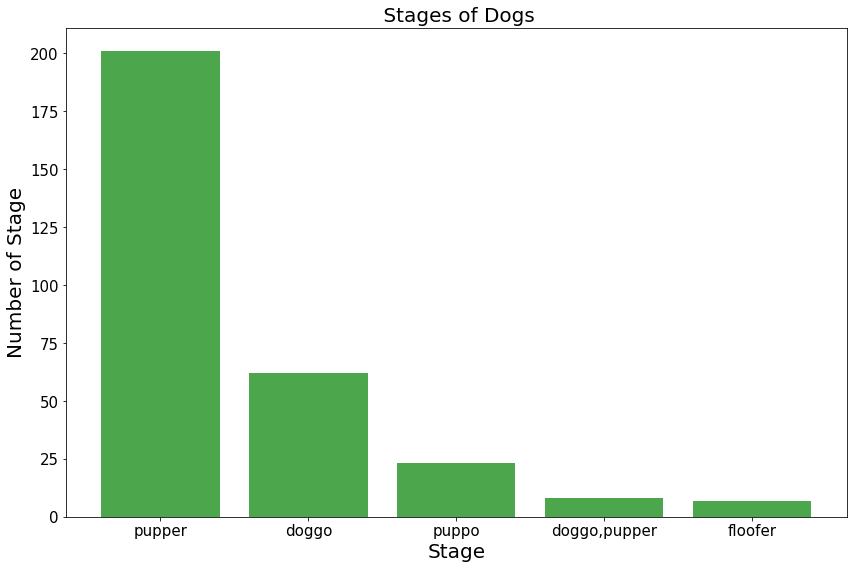

In [232]:
plt.figure(figsize=(14,9))
plt.rcParams['font.size'] = '15'
plt.bar(stage.index,stage.values ,color='g' ,alpha=.7)
plt.xlabel('Stage',fontsize=20)
plt.ylabel('Number of Stage',fontsize=20)
plt.title(' Stages of Dogs',fontsize=20)


Text(0.5, 1.0, ' Source of tweet  ')

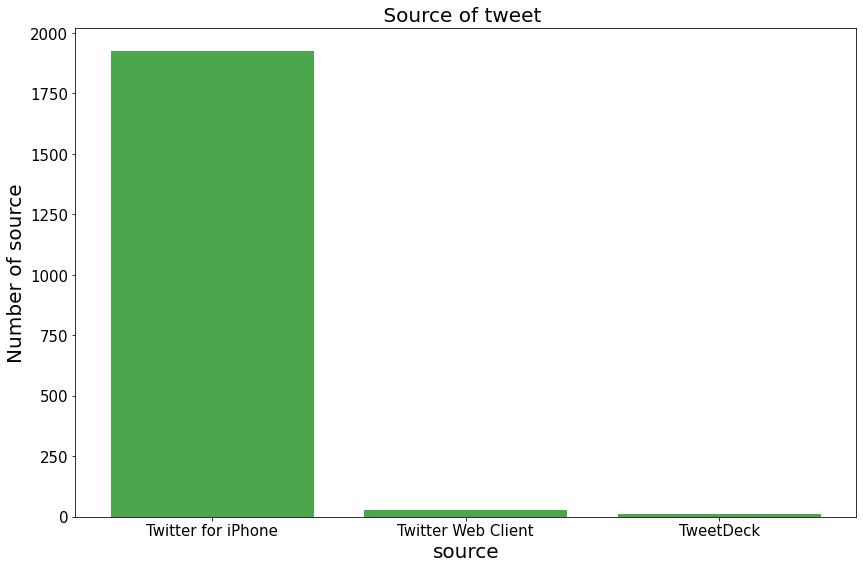

In [233]:
plt.figure(figsize=(14,9))
plt.rcParams['font.size'] = '15'
plt.bar(com_source.index,com_source.values ,color='g' ,alpha=.7)
plt.xlabel('source',fontsize=20)
plt.ylabel('Number of source',fontsize=20)
plt.title(' Source of tweet  ',fontsize=20)

Text(0.5, 1.0, 'The highest 11 breed')

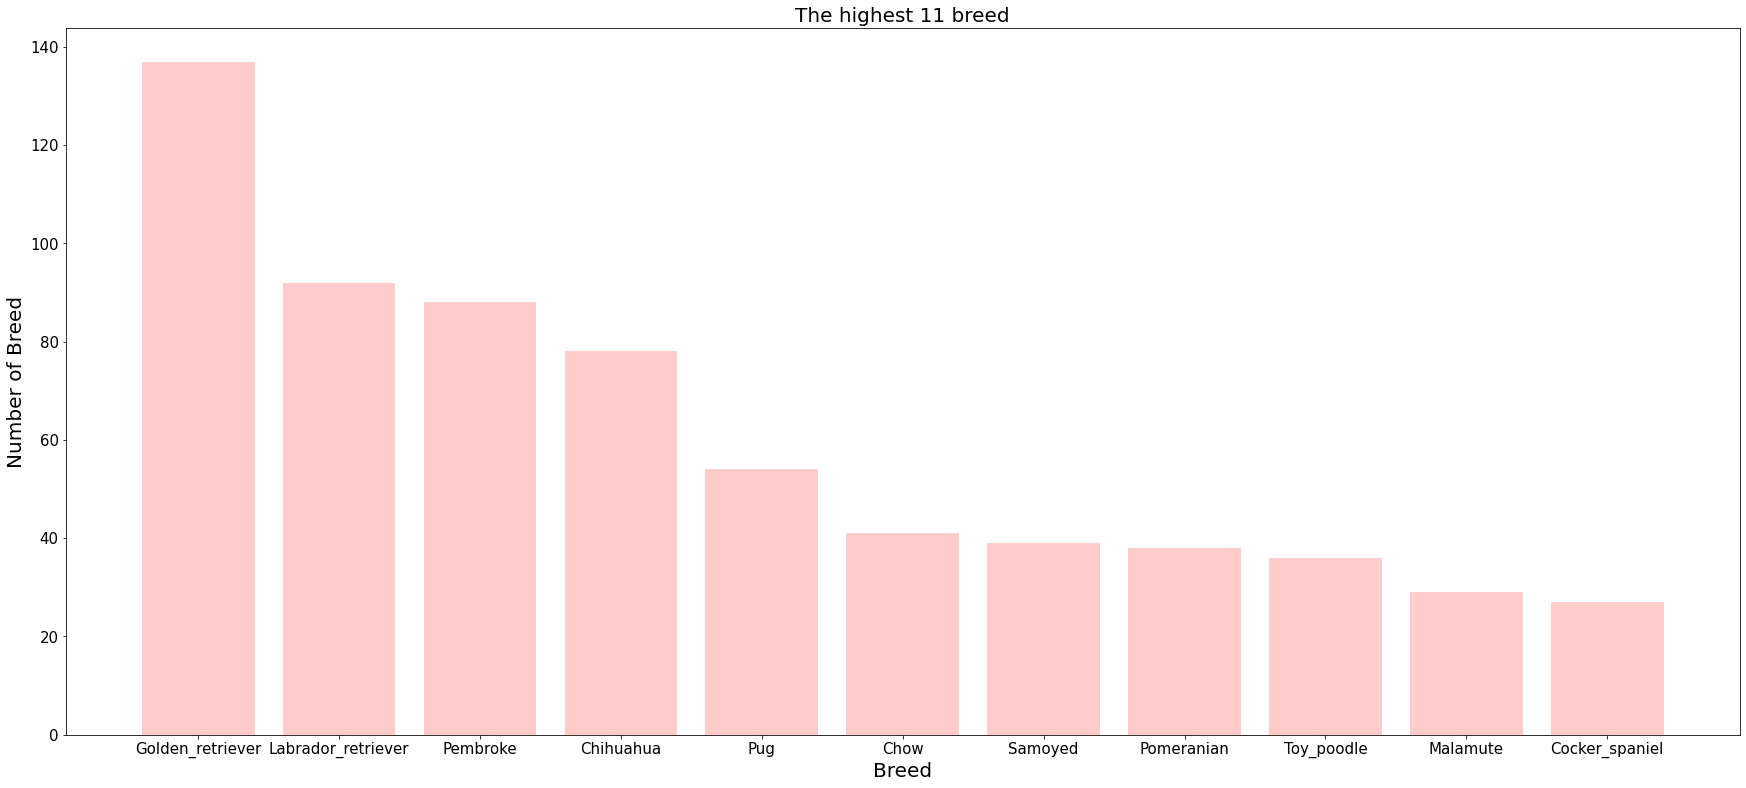

In [234]:
plt.figure(figsize=(30,13))
plt.rcParams['font.size'] = '15'
plt.bar(breed_11.index,breed_11.values ,color='r',alpha=.2)
plt.xlabel('Breed',fontsize=20)
plt.ylabel('Number of Breed',fontsize=20)
plt.title('The highest 11 breed',fontsize=20)

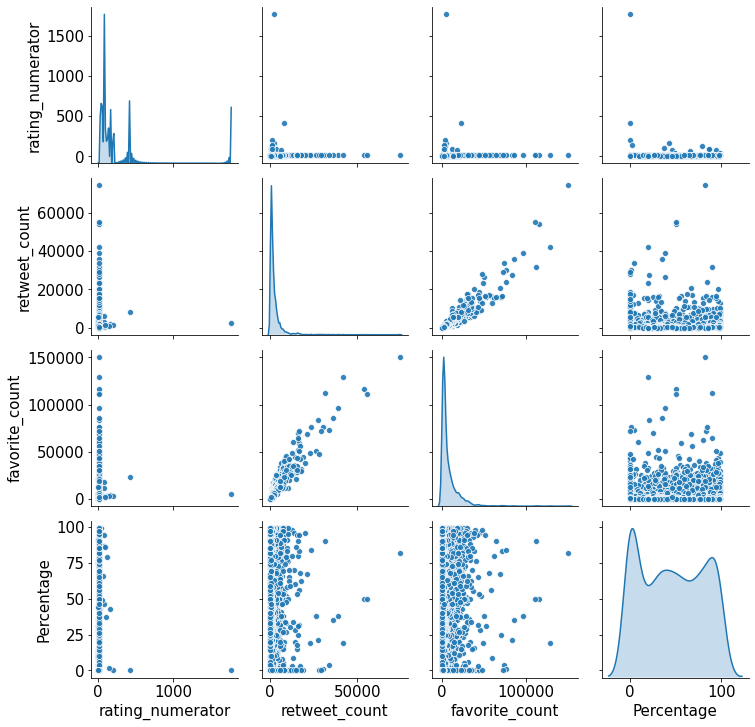

In [235]:
sns.pairplot(df, 
             vars = ['rating_numerator', 'retweet_count', 'favorite_count','Percentage'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.9});

In [236]:
def top10(kind,name):
    fav_counts_kind = df[df[kind] != 'none']
    fav_counts_kind = fav_counts_kind.groupby([kind])
    fav_counts_kind = fav_counts_kind[name].mean()
    fav_counts_kind = fav_counts_kind.sort_values(ascending = False)
    fav_counts_kind_10= fav_counts_kind.head(10)
    return fav_counts_kind_10

def visual(line1,line2,kind):
    plt.figure(figsize=(25,10))
    plt.plot(line1.index, line1, color = 'g',label='favorite_count')
    plt.plot(line2.index,line2 ,color='m',label='retweet_count')
    plt.xlabel(' Dog '+kind , fontsize = 14)
    plt.ylabel('Average Favorite Count & retweet_count', fontsize = 15)
    plt.title('Top 10 Dog ' +kind + ' '+'by   average Favorite Count & retweet_count', fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.legend()
    plt.show();

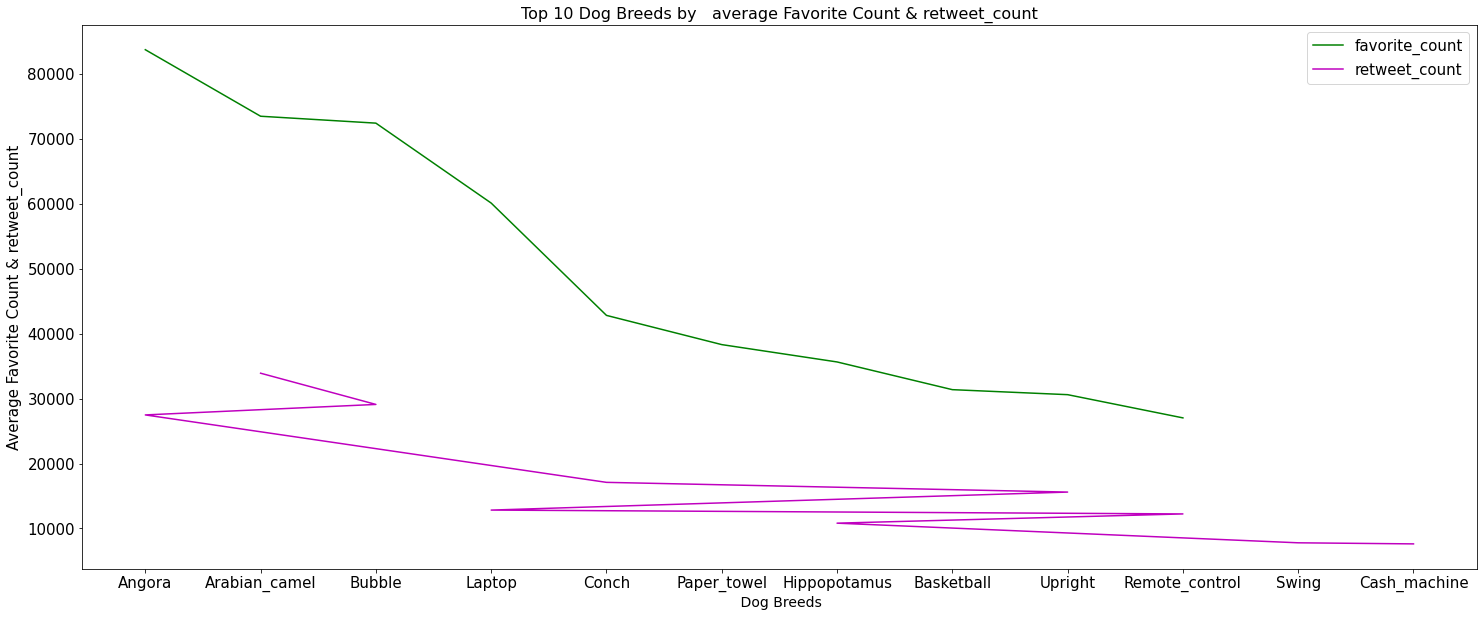

In [237]:
top10('breed','favorite_count') ,top10('breed','retweet_count')
visual(top10('breed','favorite_count'),top10('breed','retweet_count'),'Breeds')

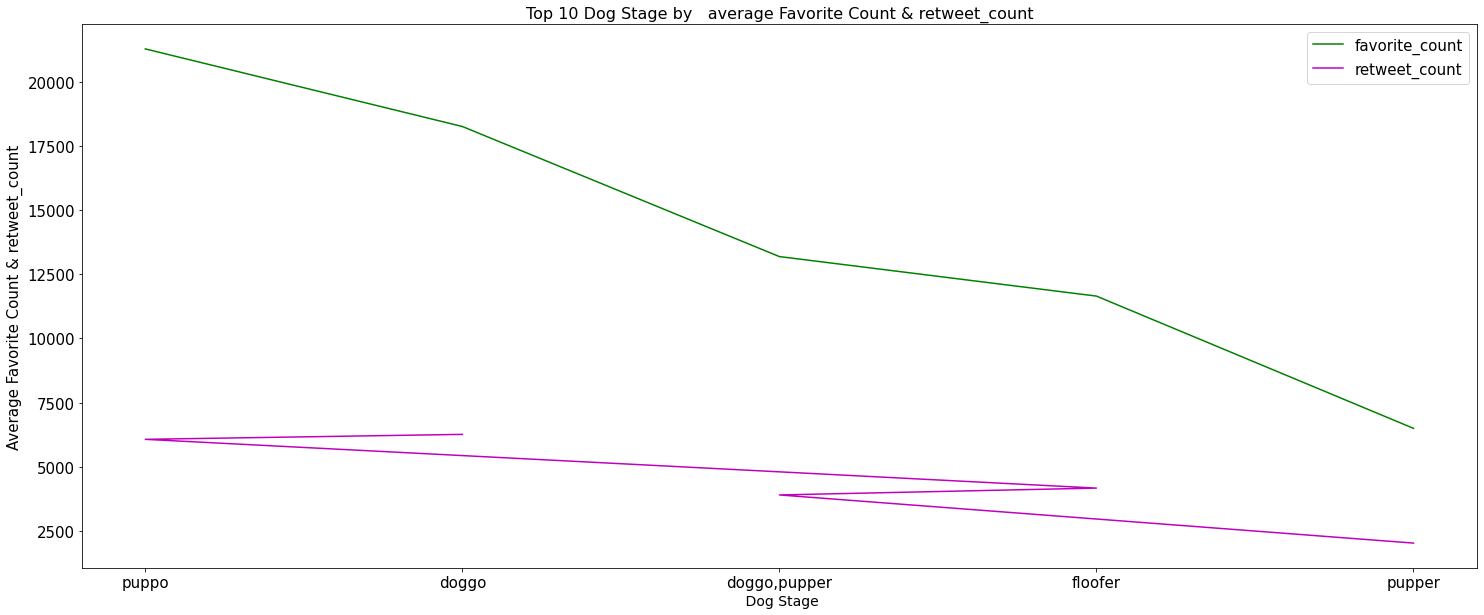

In [238]:
top10('stage','favorite_count') ,top10('stage','retweet_count')
visual(top10('stage','favorite_count') ,top10('stage','retweet_count'),'Stage')